In [1]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np

# set font
import matplotlib as mpl

# for Mac
# mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
mpl.rc('font',family='MS Gothic')

In [9]:
kagoshimamesh1 = gpd.read_file('data/SDDSWS4028.zip')
kagoshimamesh2 = gpd.read_file('data/SDDSWS4129.zip')
kagoshimamesh3 = gpd.read_file('data/SDDSWS4229.zip')
kagoshimamesh4 = gpd.read_file('data/SDDSWS4128.zip')

In [10]:
kagoshimamesh = gpd.pd.concat([kagoshimamesh1,kagoshimamesh2,kagoshimamesh3,kagoshimamesh4])

<Axes: >

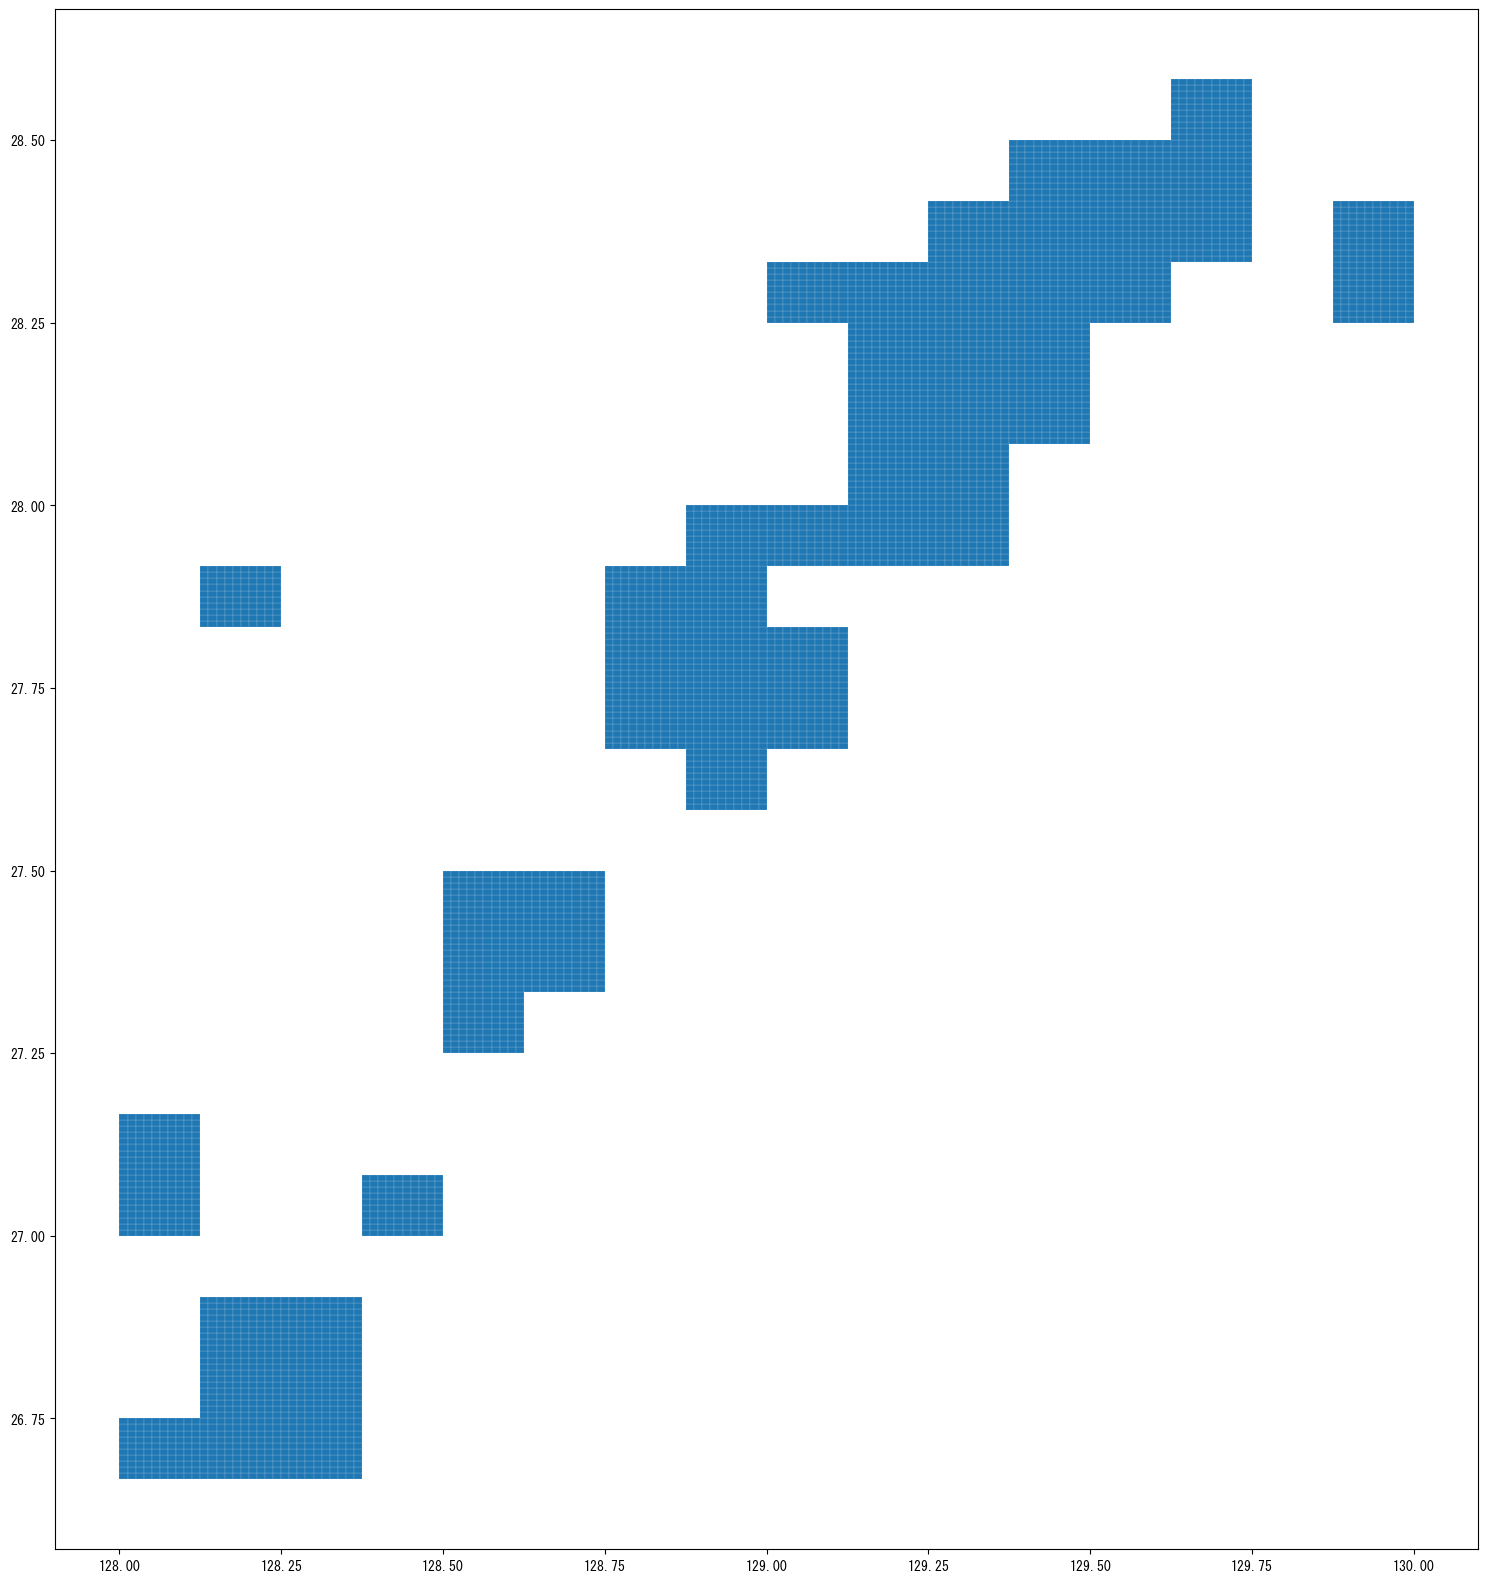

In [11]:
kagoshimamesh.plot(figsize=(20,20),edgecolor='white',linewidth=0.1)

In [13]:
kagoshimamesh.head()

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry
0,40280000,4028,00,00,1,"POLYGON ((128.01250 26.66667, 128.00000 26.666..."
1,40280001,4028,00,01,2,"POLYGON ((128.02500 26.66667, 128.01250 26.666..."
2,40280002,4028,00,02,3,"POLYGON ((128.03750 26.66667, 128.02500 26.666..."
3,40280003,4028,00,03,4,"POLYGON ((128.05000 26.66667, 128.03750 26.666..."
4,40280004,4028,00,04,5,"POLYGON ((128.06250 26.66667, 128.05000 26.666..."


In [14]:
kagoshimadata1 = pd.read_csv('data/tblT001100S4229.zip', encoding='cp932')
kagoshimadata2 = pd.read_csv('data/tblT001100S4129.zip', encoding='cp932')
kagoshimadata3 = pd.read_csv('data/tblT001100S4128.zip', encoding='cp932')
kagoshimadata4 = pd.read_csv('data/tblT001100S4028.zip', encoding='cp932')

In [15]:
kagoshimadata1.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
0,NaN,NaN,NaN,NaN,人口（総数）,人口（総数） 男,人口（総数） 女,０～１４歳人口 総数,０～１４歳人口 男,０～１４歳人口 女,...,６人世帯数 一般世帯数,７人以上世帯数 一般世帯数,親族のみの世帯数 一般世帯数,核家族世帯数 一般世帯数,核家族以外の世帯数 一般世帯数,６歳未満世帯員のいる世帯数 一般世帯数,６５歳以上世帯員のいる世帯数 一般世帯数,世帯主の年齢が２０～２９歳の１人世帯数 一般世帯数,高齢単身世帯数 一般世帯数,高齢夫婦世帯数 一般世帯数
1,42290138.0,0.0,NaN,NaN,42,20,22,3,1,2,...,0,0,11,11,0,0,18,1,10,5
2,42290152.0,2.0,42290153.0,NaN,2,1,1,*,*,*,...,*,*,*,*,*,*,*,*,*,*
3,42290153.0,1.0,NaN,42290152,68,29,39,10,4,6,...,1,0,18,17,1,2,19,2,7,8
4,42290230.0,0.0,NaN,NaN,35,19,16,0,0,0,...,0,0,10,10,0,0,20,0,12,8


In [17]:
kagoshimadata1= kagoshimadata1[1:]
kagoshimadata2= kagoshimadata2[1:]
kagoshimadata3= kagoshimadata3[1:]
kagoshimadata4= kagoshimadata4[1:]

In [18]:
kagoshimadata1= kagoshimadata1.replace('*',np.nan)
kagoshimadata2= kagoshimadata2.replace('*',np.nan)
kagoshimadata3= kagoshimadata3.replace('*',np.nan)
kagoshimadata4= kagoshimadata4.replace('*',np.nan)

ここまであってるかどうかわからないです。。。

In [19]:
kagoshimadata= pd.concat([kagoshimadata1,kagoshimadata2,kagoshimadata3,kagoshimadata4])

In [20]:
kagoshimadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 669 entries, 2 to 116
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    669 non-null    float64
 1   HTKSYORI    669 non-null    float64
 2   HTKSAKI     136 non-null    float64
 3   GASSAN      106 non-null    object 
 4   T001100001  669 non-null    object 
 5   T001100002  669 non-null    object 
 6   T001100003  669 non-null    object 
 7   T001100004  533 non-null    object 
 8   T001100005  533 non-null    object 
 9   T001100006  533 non-null    object 
 10  T001100007  533 non-null    object 
 11  T001100008  533 non-null    object 
 12  T001100009  533 non-null    object 
 13  T001100010  533 non-null    object 
 14  T001100011  533 non-null    object 
 15  T001100012  533 non-null    object 
 16  T001100013  533 non-null    object 
 17  T001100014  533 non-null    object 
 18  T001100015  533 non-null    object 
 19  T001100016  533 non-null    object

In [21]:
kagoshimadata.columns

Index(['KEY_CODE', 'HTKSYORI', 'HTKSAKI', 'GASSAN', 'T001100001', 'T001100002',
       'T001100003', 'T001100004', 'T001100005', 'T001100006', 'T001100007',
       'T001100008', 'T001100009', 'T001100010', 'T001100011', 'T001100012',
       'T001100013', 'T001100014', 'T001100015', 'T001100016', 'T001100017',
       'T001100018', 'T001100019', 'T001100020', 'T001100021', 'T001100022',
       'T001100023', 'T001100024', 'T001100025', 'T001100026', 'T001100027',
       'T001100028', 'T001100029', 'T001100030', 'T001100031', 'T001100032',
       'T001100033', 'T001100034', 'T001100035', 'T001100036', 'T001100037',
       'T001100038', 'T001100039', 'T001100040', 'T001100041', 'T001100042',
       'T001100043', 'T001100044', 'T001100045', 'T001100046', 'T001100047',
       'T001100048', 'T001100049', 'T001100050'],
      dtype='object')

In [22]:
kagoshimadata.columns[4:]

Index(['T001100001', 'T001100002', 'T001100003', 'T001100004', 'T001100005',
       'T001100006', 'T001100007', 'T001100008', 'T001100009', 'T001100010',
       'T001100011', 'T001100012', 'T001100013', 'T001100014', 'T001100015',
       'T001100016', 'T001100017', 'T001100018', 'T001100019', 'T001100020',
       'T001100021', 'T001100022', 'T001100023', 'T001100024', 'T001100025',
       'T001100026', 'T001100027', 'T001100028', 'T001100029', 'T001100030',
       'T001100031', 'T001100032', 'T001100033', 'T001100034', 'T001100035',
       'T001100036', 'T001100037', 'T001100038', 'T001100039', 'T001100040',
       'T001100041', 'T001100042', 'T001100043', 'T001100044', 'T001100045',
       'T001100046', 'T001100047', 'T001100048', 'T001100049', 'T001100050'],
      dtype='object')

In [23]:
kagoshimadata[kagoshimadata.columns[4:]]

,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,T001100007,T001100008,T001100009,T001100010,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
2,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68,29,39,10,4,6,60,26,34,31,...,1,0,18,17,1,2,19,2,7,8
4,35,19,16,0,0,0,35,19,16,9,...,0,0,10,10,0,0,20,0,12,8
5,7,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10,4,6,1,1,0,16,6,10,5,...,0,0,3,3,0,0,9,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,51,20,31,5,2,3,46,18,28,25,...,0,0,14,14,0,2,15,0,7,3
113,15,6,9,4,2,2,11,4,7,10,...,0,1,3,2,1,1,1,1,0,0
114,159,80,79,41,20,21,118,60,58,93,...,1,0,41,37,4,14,19,2,10,6
115,408,200,208,111,48,63,297,152,145,226,...,3,0,104,103,1,36,50,9,28,14


In [24]:
kagoshimadata[kagoshimadata.columns[4:]].astype(float)

,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,T001100007,T001100008,T001100009,T001100010,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
2,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68.0,29.0,39.0,10.0,4.0,6.0,60.0,26.0,34.0,31.0,...,1.0,0.0,18.0,17.0,1.0,2.0,19.0,2.0,7.0,8.0
4,35.0,19.0,16.0,0.0,0.0,0.0,35.0,19.0,16.0,9.0,...,0.0,0.0,10.0,10.0,0.0,0.0,20.0,0.0,12.0,8.0
5,7.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10.0,4.0,6.0,1.0,1.0,0.0,16.0,6.0,10.0,5.0,...,0.0,0.0,3.0,3.0,0.0,0.0,9.0,0.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,51.0,20.0,31.0,5.0,2.0,3.0,46.0,18.0,28.0,25.0,...,0.0,0.0,14.0,14.0,0.0,2.0,15.0,0.0,7.0,3.0
113,15.0,6.0,9.0,4.0,2.0,2.0,11.0,4.0,7.0,10.0,...,0.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0
114,159.0,80.0,79.0,41.0,20.0,21.0,118.0,60.0,58.0,93.0,...,1.0,0.0,41.0,37.0,4.0,14.0,19.0,2.0,10.0,6.0
115,408.0,200.0,208.0,111.0,48.0,63.0,297.0,152.0,145.0,226.0,...,3.0,0.0,104.0,103.0,1.0,36.0,50.0,9.0,28.0,14.0


In [25]:
kagoshimadata[kagoshimadata.columns[4:]]=kagoshimadata[kagoshimadata.columns[4:]].astype(float)

In [26]:
kagoshimadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 669 entries, 2 to 116
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    669 non-null    float64
 1   HTKSYORI    669 non-null    float64
 2   HTKSAKI     136 non-null    float64
 3   GASSAN      106 non-null    object 
 4   T001100001  669 non-null    float64
 5   T001100002  669 non-null    float64
 6   T001100003  669 non-null    float64
 7   T001100004  533 non-null    float64
 8   T001100005  533 non-null    float64
 9   T001100006  533 non-null    float64
 10  T001100007  533 non-null    float64
 11  T001100008  533 non-null    float64
 12  T001100009  533 non-null    float64
 13  T001100010  533 non-null    float64
 14  T001100011  533 non-null    float64
 15  T001100012  533 non-null    float64
 16  T001100013  533 non-null    float64
 17  T001100014  533 non-null    float64
 18  T001100015  533 non-null    float64
 19  T001100016  533 non-null    float6

In [27]:
kagoshimamesh['KEY_CODE']=kagoshimamesh['KEY_CODE'].astype(float)

In [28]:
kagoshimamesh = kagoshimamesh.merge(kagoshimadata, on='KEY_CODE')

In [31]:
kagoshimamesh.sample(5)

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry,HTKSYORI,HTKSAKI,GASSAN,T001100001,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
377,42294489.0,4229,44,89,1690,"POLYGON ((129.62500 28.40000, 129.61250 28.400...",0.0,NaN,NaN,195.0,...,2.0,0.0,57.0,49.0,8.0,10.0,42.0,0.0,13.0,15.0
363,42294470.0,4229,44,70,1671,"POLYGON ((129.51250 28.39167, 129.50000 28.391...",0.0,NaN,NaN,674.0,...,5.0,0.0,143.0,128.0,15.0,16.0,265.0,17.0,175.0,39.0
604,41285713.0,4128,57,13,814,"POLYGON ((128.92500 27.75833, 128.91250 27.758...",0.0,NaN,NaN,17.0,...,0.0,0.0,5.0,5.0,0.0,0.0,5.0,0.0,2.0,1.0
254,42293282.0,4229,32,82,1083,"POLYGON ((129.28750 28.31667, 129.27500 28.316...",0.0,NaN,NaN,19.0,...,0.0,0.0,6.0,5.0,1.0,0.0,6.0,0.0,1.0,4.0
324,42294349.0,4229,43,49,1550,"POLYGON ((129.50000 28.36667, 129.48750 28.366...",0.0,NaN,NaN,1971.0,...,7.0,1.0,541.0,508.0,33.0,55.0,551.0,18.0,278.0,132.0


In [32]:
kagoshimamesh = kagoshimamesh.to_crs(3857)

<Axes: >

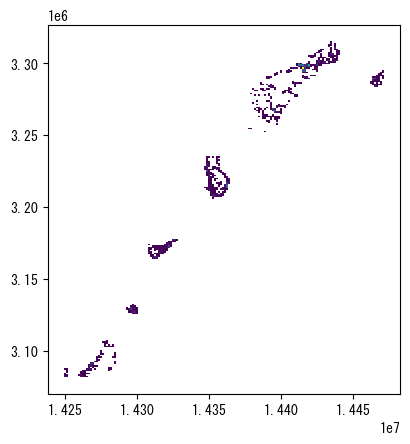

In [33]:
kagoshimamesh.plot(column='T001100001')

T-T  TvT  ToT  TqT 

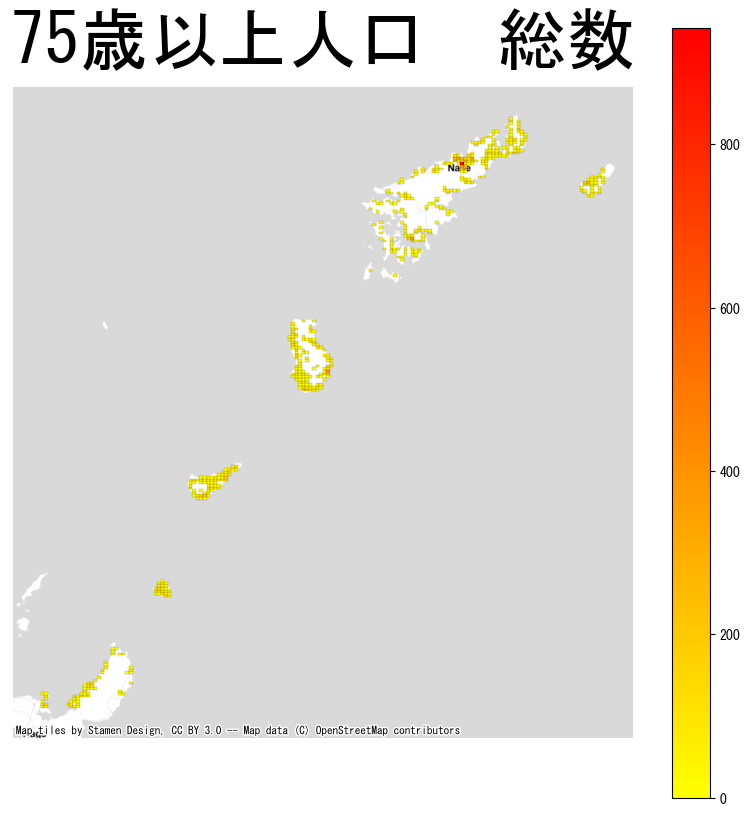

In [41]:
# population map
ax = kagoshimamesh.plot(figsize=(10,10),
         column='T001100022',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1)

# hide axes
ax.axis('off')

# title
ax.set_title('75歳以上人口　総数',fontsize=50)

cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

鹿児島住んでいる人少ないです。